<center>
<h1>Documento de matemática discreta</h1>
<h3>Lorenzo Marquesini</h3>
<h3>2024-11-13</h3>
</center>

<style>
  body {
    margin: 75px; /* Cambia el valor para ajustar el margen */
  }
  .container {
    margin: 75px;
  }
</style>

## Resumen
En este trabajo se analiza la logística de entregas de la empresa Iflow en la ciudad de Buenos Aires, utilizando técnicas de coloración de grafos para identificar rutas potenciales de repartidores. A partir de datos geográficos y temporales de las entregas realizadas entre mayo y agosto de 2024 para dos clientes específicos, se busca optimizar y visualizar las rutas de entrega mediante algoritmos de teoría de grafos y representación gráfica mejorada.

## Introducción
La logística de distribución es un factor crítico en la eficiencia operacional de empresas de entrega. Con el crecimiento de las ciudades y la demanda de entregas rápidas, es esencial optimizar las rutas de los repartidores para minimizar tiempos y costos. Este estudio se enfoca en las entregas realizadas por Iflow, una empresa de logística, a supermercados en Buenos Aires, utilizando datos reales de entregas diarias de dos clientes (identificados como cliente 20 y 70) durante un período de cuatro meses en 2024.

El objetivo principal es aplicar técnicas de coloración de grafos para identificar y visualizar posibles rutas de repartidores, aprovechando información geográfica y temporal. Esto permitirá proponer mejoras en la asignación de rutas y recursos, contribuyendo a una logística más eficiente.

In [2]:
# Scientific and Mathematical Libraries
import numpy as np
import pandas as pd
import datetime as dt
from scipy.spatial.distance import pdist, squareform

# Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import plotly.express as px

# Network Analysis
import networkx as nx

# Utility Libraries
from itertools import combinations

# Carga de datos    
df = pd.read_csv('../data/clean_iflow_data.csv')

# Formateamos correctamente los datos
df['fecha'] = pd.to_datetime(df['fin_visita'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.date

# Muestra de los datos
df.head()

,Unnamed: 0,id_orden,cliente,localidad,direccion,latitud,longitud,bultos,unidades,peso,...,inicio_visita,fin_visita,dia,mes,hora,diferencia_minutos,dia_str,duracion_visita_min,duracion_visita_horas,fecha
0,1,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.516667,30,24.910,...,2024-05-23 14:13:53,2024-05-23 14:14:53,23.0,5.0,14.0,308.883333,jueves,1.000000,0.016667,2024-05-23
1,2,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.866667,38,26.260,...,2024-05-10 16:43:00,2024-05-10 16:43:00,10.0,5.0,16.0,458.000000,viernes,0.000000,0.000000,2024-05-10
2,3,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.400000,32,24.888,...,2024-05-30 09:41:36,2024-05-30 09:50:08,30.0,5.0,9.0,47.133333,jueves,8.533333,0.142222,2024-05-30
3,4,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,1.800000,28,14.040,...,2024-06-13 13:32:55,2024-06-13 13:39:55,13.0,6.0,13.0,265.916667,jueves,7.000000,0.116667,2024-06-13
4,5,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.116667,31,14.377,...,2024-06-27 15:36:00,2024-06-27 15:36:00,27.0,6.0,15.0,369.000000,jueves,0.000000,0.000000,2024-06-27


Para simplificar el análisis nos limitamos al estudio de los datos del día 26-05-2024. Despues de filtrar la fecha seleccionamos las siguientes variables de interes:

* **cliente**: Toma los valores "20" o "70" e indica de cual cliente fue entregada la mercadería.
* **fin_visita**: Indica la fecha y hora al momento de finalizar la entrega.
* Cordenadas: Columnas **latitud** y **longitud**. 

In [28]:
# Selección de la fecha objetivo
df_selected_date =  df[df['fecha'] == dt.date(2024, 5, 30)]

# Seleccionamos unicamente las variables de interes
df_geo = df_selected_date[['cliente', 'latitud', 'longitud', 'fin_visita']].sort_values(by='fin_visita').reset_index()

# Creamos una nueva variable "order" que indica el nro de entrega en orden cronológico. 
df_geo['order'] = np.arange(1, len(df_geo) + 1)
df_geo.head()

df_geo.to_csv('../data/df_geo_2.csv', index=False)

In [14]:
import plotly.express as px

# Asegúrate de que "cliente" sea tratado como una categoría
df_geo["cliente"] = df_geo["cliente"].astype(str)

# Crear el gráfico de dispersión con scatter_mapbox
fig = px.scatter_mapbox(df_geo, 
                        lat="latitud", 
                        lon="longitud", 
                        hover_name="order", 
                        hover_data=["cliente", "fin_visita"],
                        color="cliente",
                        color_discrete_map={"20": "blue", "70": "red"},
                        zoom=10, 
                        height=600)

# Actualizar el estilo del layout para el mapa en blanco y negro
fig.update_layout(mapbox_style="carto-positron")

# Mostrar el gráfico
fig.show()


In [20]:
import plotly.express as px
import pandas as pd

# Asegúrate de que "cliente" sea tratado como una categoría
df_geo["cliente"] = df_geo["cliente"].astype(str)

# Selecciona las primeras 20 filas y ordénalas cronológicamente por "fin_visita"
df_geo_subset = df_geo.head(20).sort_values(by="fin_visita")

# Crear el gráfico de dispersión con scatter_mapbox
fig = px.scatter_mapbox(df_geo_subset, 
                        lat="latitud", 
                        lon="longitud", 
                        hover_name="order", 
                        hover_data=["cliente", "fin_visita"],
                        color="cliente",
                        color_discrete_map={"20": "blue", "70": "red"},
                        zoom=10, 
                        height=600)

# Añadir líneas para conectar los puntos en orden cronológico
fig.add_trace(px.line_mapbox(df_geo_subset, 
                             lat="latitud", 
                             lon="longitud").data[0])

# Añadir etiquetas de texto sobre cada punto usando el número de "orden"
fig.add_scattermapbox(lat=df_geo_subset["latitud"],
                      lon=df_geo_subset["longitud"],
                      mode="text",
                      text=df_geo_subset["order"],
                      textposition="top right",
                      showlegend=False)

# Actualizar el estilo del layout para el mapa en blanco y negro
fig.update_layout(mapbox_style="carto-positron")

# Mostrar el gráfico
fig.show()


## Teoría

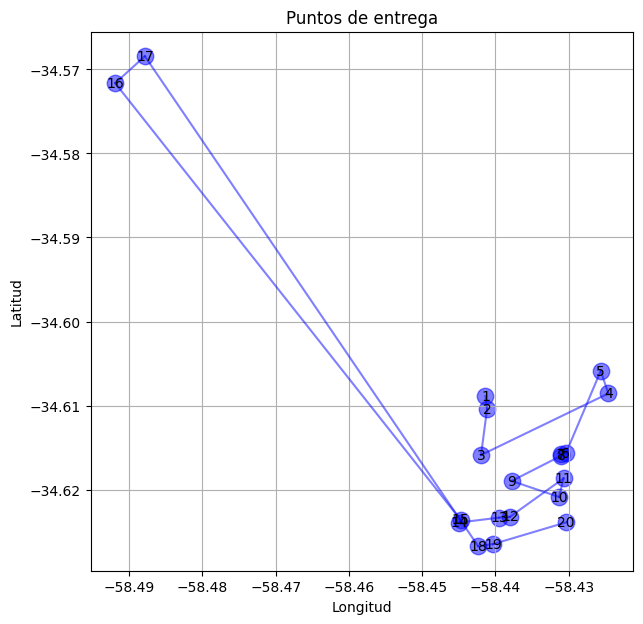

In [ ]:
plt.figure(figsize=(7, 7))
for i, row in df_geo.head(20).iterrows():
    plt.scatter(row['longitud'], row['latitud'], s=140, c='blue', marker='o', alpha=0.5)
    plt.text(row['longitud'], row['latitud'], str(row['order']), ha='center', va='center')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Puntos de entrega')
plt.grid(True)
for i in range(len(df_geo.head(20)) - 1):
    plt.plot([df_geo.head(20).iloc[i]['longitud'], df_geo.head(20).iloc[i+1]['longitud']], [df_geo.head(20).iloc[i]['latitud'], df_geo.head(20).iloc[i+1]['latitud']], color='blue', alpha=0.5)
plt.savefig('../images/grafico1.png')
plt.show()

In [ ]:
def estimate_time_distance(lat1, lon1, lat2, lon2, avg_speed_kmh=30):
    # Convert latitude/longitude to radians
    lat1, lon1 = np.radians(lat1), np.radians(lon1)
    lat2, lon2 = np.radians(lat2), np.radians(lon2)
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Earth's radius in kilometers
    r = 6371
    
    # Calculate distance in kilometers
    distance = c * r
    
    # Calculate time in minutes
    time_hours = distance / avg_speed_kmh
    time_minutes = time_hours * 60
    
    return time_minutes


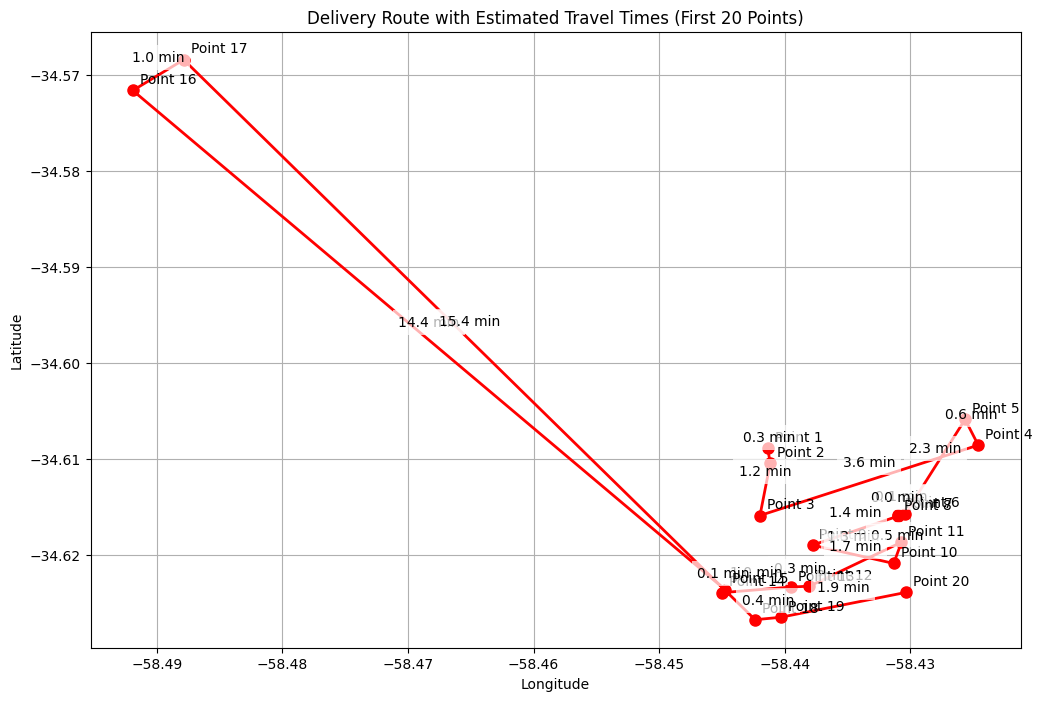

In [25]:
# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Plot points and lines
plt.plot(df_geo['longitud'].head(20), df_geo['latitud'].head(20), 'ro-', markersize=8, linewidth=2)

# Add point labels
for i, row in df_geo.head(20).iterrows():
    plt.annotate(f'Point {i+1}', 
                (row['longitud'], row['latitud']),
                xytext=(5, 5), textcoords='offset points')
    
    # Add time estimates between consecutive points
    if i < len(df_geo.head(20))-1:
        next_row = df_geo.iloc[i+1]
        time = estimate_time_distance(row['latitud'], row['longitud'],
                                   next_row['latitud'], next_row['longitud'])
        
        # Calculate midpoint for time label
        mid_lon = (row['longitud'] + next_row['longitud']) / 2
        mid_lat = (row['latitud'] + next_row['latitud']) / 2
        
        # Add time label
        plt.annotate(f'{time:.1f} min',
                    (mid_lon, mid_lat),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Delivery Route with Estimated Travel Times (First 20 Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


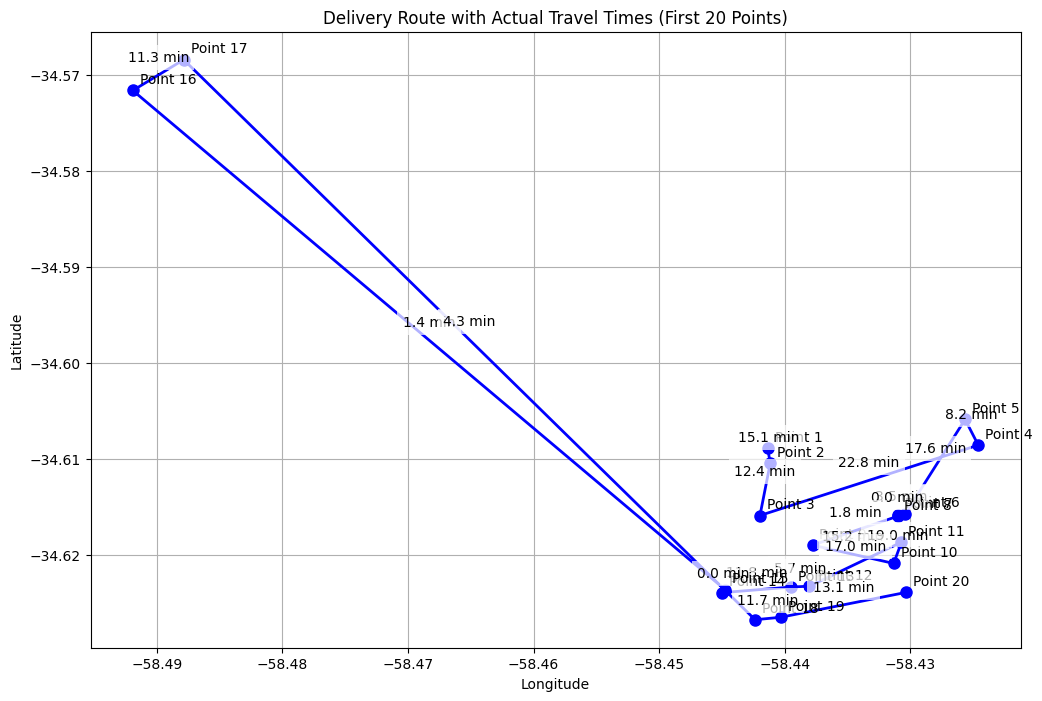

In [26]:
# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Plot points and lines
plt.plot(df_geo['longitud'].head(20), df_geo['latitud'].head(20), 'bo-', markersize=8, linewidth=2)

# Add point labels and actual travel times
for i, row in df_geo.head(20).iterrows():
    plt.annotate(f'Point {i+1}', 
                (row['longitud'], row['latitud']),
                xytext=(5, 5), textcoords='offset points')
    
    # Add actual time differences between consecutive points
    if i < len(df_geo.head(20))-1:
        next_row = df_geo.iloc[i+1]
        
        # Calculate time difference in minutes between fin_visita timestamps
        time_diff = (pd.to_datetime(next_row['fin_visita']) - 
                    pd.to_datetime(row['fin_visita'])).total_seconds() / 60
        
        # Calculate midpoint for time label
        mid_lon = (row['longitud'] + next_row['longitud']) / 2
        mid_lat = (row['latitud'] + next_row['latitud']) / 2
        
        # Add time label
        plt.annotate(f'{time_diff:.1f} min',
                    (mid_lon, mid_lat),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Delivery Route with Actual Travel Times (First 20 Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


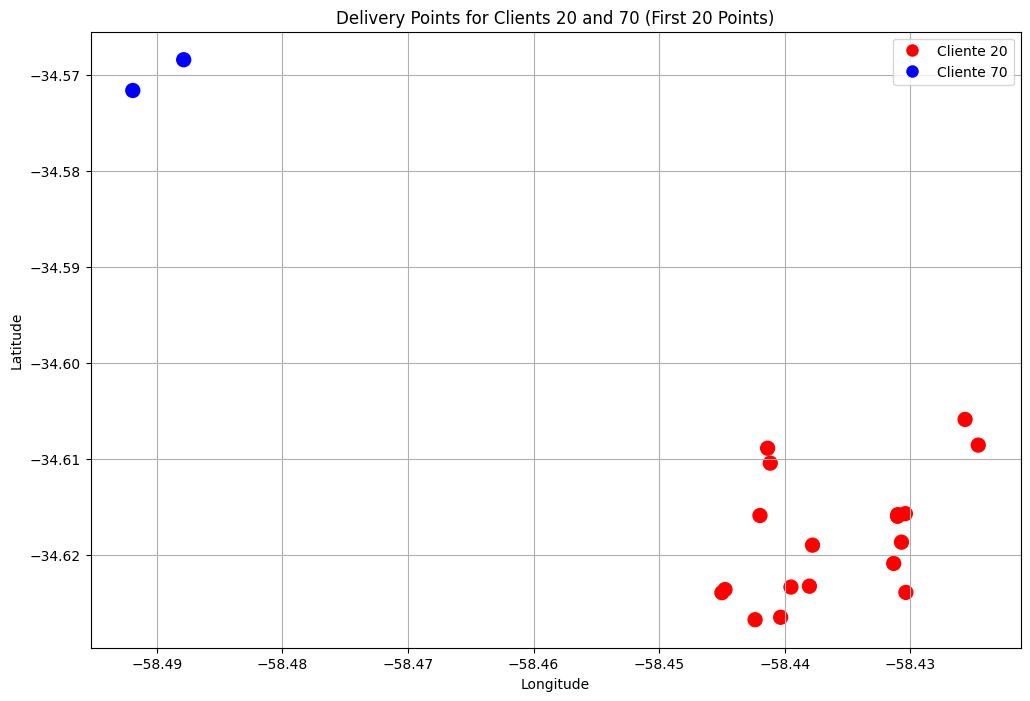

In [ ]:
# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Create a color map for clients 20 and 70
colors = ['red' if cliente == 20 else 'blue' if cliente == 70 else 'gray' 
          for cliente in df_geo['cliente'].head(20)]

# Create a scatter plot with points colored by cliente
scatter = plt.scatter(df_geo['longitud'].head(20), df_geo['latitud'].head(20),
                     c=colors,
                     s=100)  # Size of points

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                         label='Cliente 20', markersize=10),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                         label='Cliente 70', markersize=10)]
plt.legend(handles=legend_elements)

plt.title('Delivery Points for Clients 20 and 70 (First 20 Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [28]:
df_muestra = df_geo.head(40)

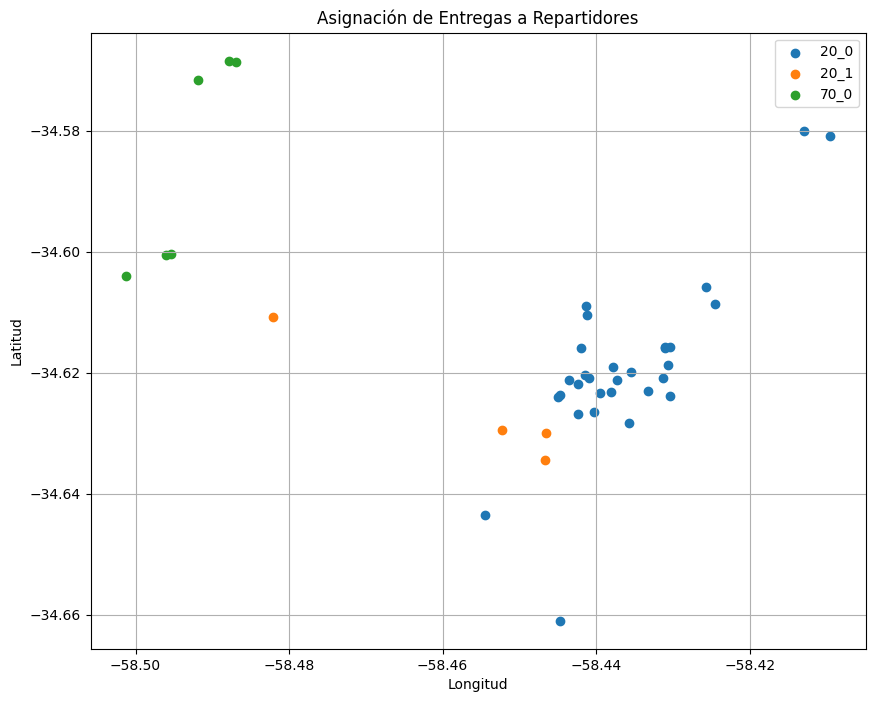

In [29]:
def assign_deliveries_to_drivers(df_muestra, velocidad_promedio=30.0, tiempo_minimo_separacion=5, factor_desvio=0.5):
    """
    Asigna entregas a repartidores usando coloreo de grafos.
    
    Args:
        df_muestra: DataFrame con las entregas a procesar
        velocidad_promedio: Velocidad promedio de los repartidores en km/h
        tiempo_minimo_separacion: Tiempo mínimo entre entregas en minutos
        factor_desvio: Factor de desvío permitido entre tiempo estimado y real
        
    Returns:
        dict: Diccionario con las asignaciones {id_repartidor: [lista_de_entregas]}
    """
    # Diccionario que almacenará las asignaciones finales de entregas a repartidores
    asignaciones_repartidores = {}

    # Procesar las entregas agrupadas por cliente
    for cliente, grupo in df_muestra.groupby('cliente'):
        # Resetear índices para facilitar el procesamiento
        entregas = grupo.reset_index(drop=True)
        n = len(entregas)
        
        # Crear un grafo vacío para modelar conflictos entre entregas
        G = nx.Graph()
        
        # Añadir un nodo por cada entrega del cliente
        for idx in entregas.index:
            G.add_node(idx)
        
        # Analizar pares de entregas para detectar conflictos
        for i, j in combinations(entregas.index, 2):
            d1 = entregas.loc[i]  # Primera entrega del par
            d2 = entregas.loc[j]  # Segunda entrega del par
            
            # Asegurar que los tiempos de entrega estén en formato datetime
            d1_fin = pd.to_datetime(d1['fin_visita']) if isinstance(d1['fin_visita'], str) else d1['fin_visita']
            d2_fin = pd.to_datetime(d2['fin_visita']) if isinstance(d2['fin_visita'], str) else d2['fin_visita']
            
            # Calcular la diferencia temporal entre entregas
            diferencia_tiempo_min = abs((d2_fin - d1_fin).total_seconds()) / 60.0
            diferencia_tiempo_horas = diferencia_tiempo_min / 60.0
            
            # Calcular la distancia física entre los puntos de entrega
            distancia = estimate_time_distance(d1['longitud'], d1['latitud'], d2['longitud'], d2['latitud'])
            
            # Calcular el tiempo mínimo necesario para viajar entre puntos
            tiempo_viaje = distancia / velocidad_promedio
            
            # Determinar si existe un conflicto entre las entregas
            if diferencia_tiempo_min <= tiempo_minimo_separacion:
                # Entregas muy cercanas en tiempo: asignar al mismo repartidor
                pass
            elif diferencia_tiempo_horas < tiempo_viaje * factor_desvio:
                # El tiempo real es mucho menor al tiempo estimado necesario
                # Añadir una arista al grafo indicando que no pueden ser realizadas por el mismo repartidor
                G.add_edge(i, j)
        
        # Aplicar algoritmo de coloreo de grafos para asignar repartidores
        # Cada color representa un repartidor diferente
        coloreo = nx.coloring.greedy_color(G, strategy='largest_first')
        
        # Distribuir las entregas entre los repartidores según el coloreo
        for idx, color in coloreo.items():
            id_repartidor = f'{cliente}_{color}'
            if id_repartidor not in asignaciones_repartidores:
                asignaciones_repartidores[id_repartidor] = []
            asignaciones_repartidores[id_repartidor].append(entregas.loc[idx])

    return asignaciones_repartidores

# Ejecutar la asignación
asignaciones = assign_deliveries_to_drivers(df_muestra)

# Visualizar las asignaciones en un mapa
colores = list(mcolors.TABLEAU_COLORS.keys())
plt.figure(figsize=(10, 8))

# Graficar las entregas de cada repartidor con un color distinto
for idx, (repartidor, entregas_repartidor) in enumerate(asignaciones.items()):
    entregas_df = pd.DataFrame(entregas_repartidor)
    latitudes = entregas_df['latitud']
    longitudes = entregas_df['longitud']
    color = colores[idx % len(colores)]
    plt.scatter(longitudes, latitudes, c=color, label=repartidor)

# Configurar detalles del gráfico
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Asignación de Entregas a Repartidores')
plt.legend()
plt.grid(True)
plt.show()

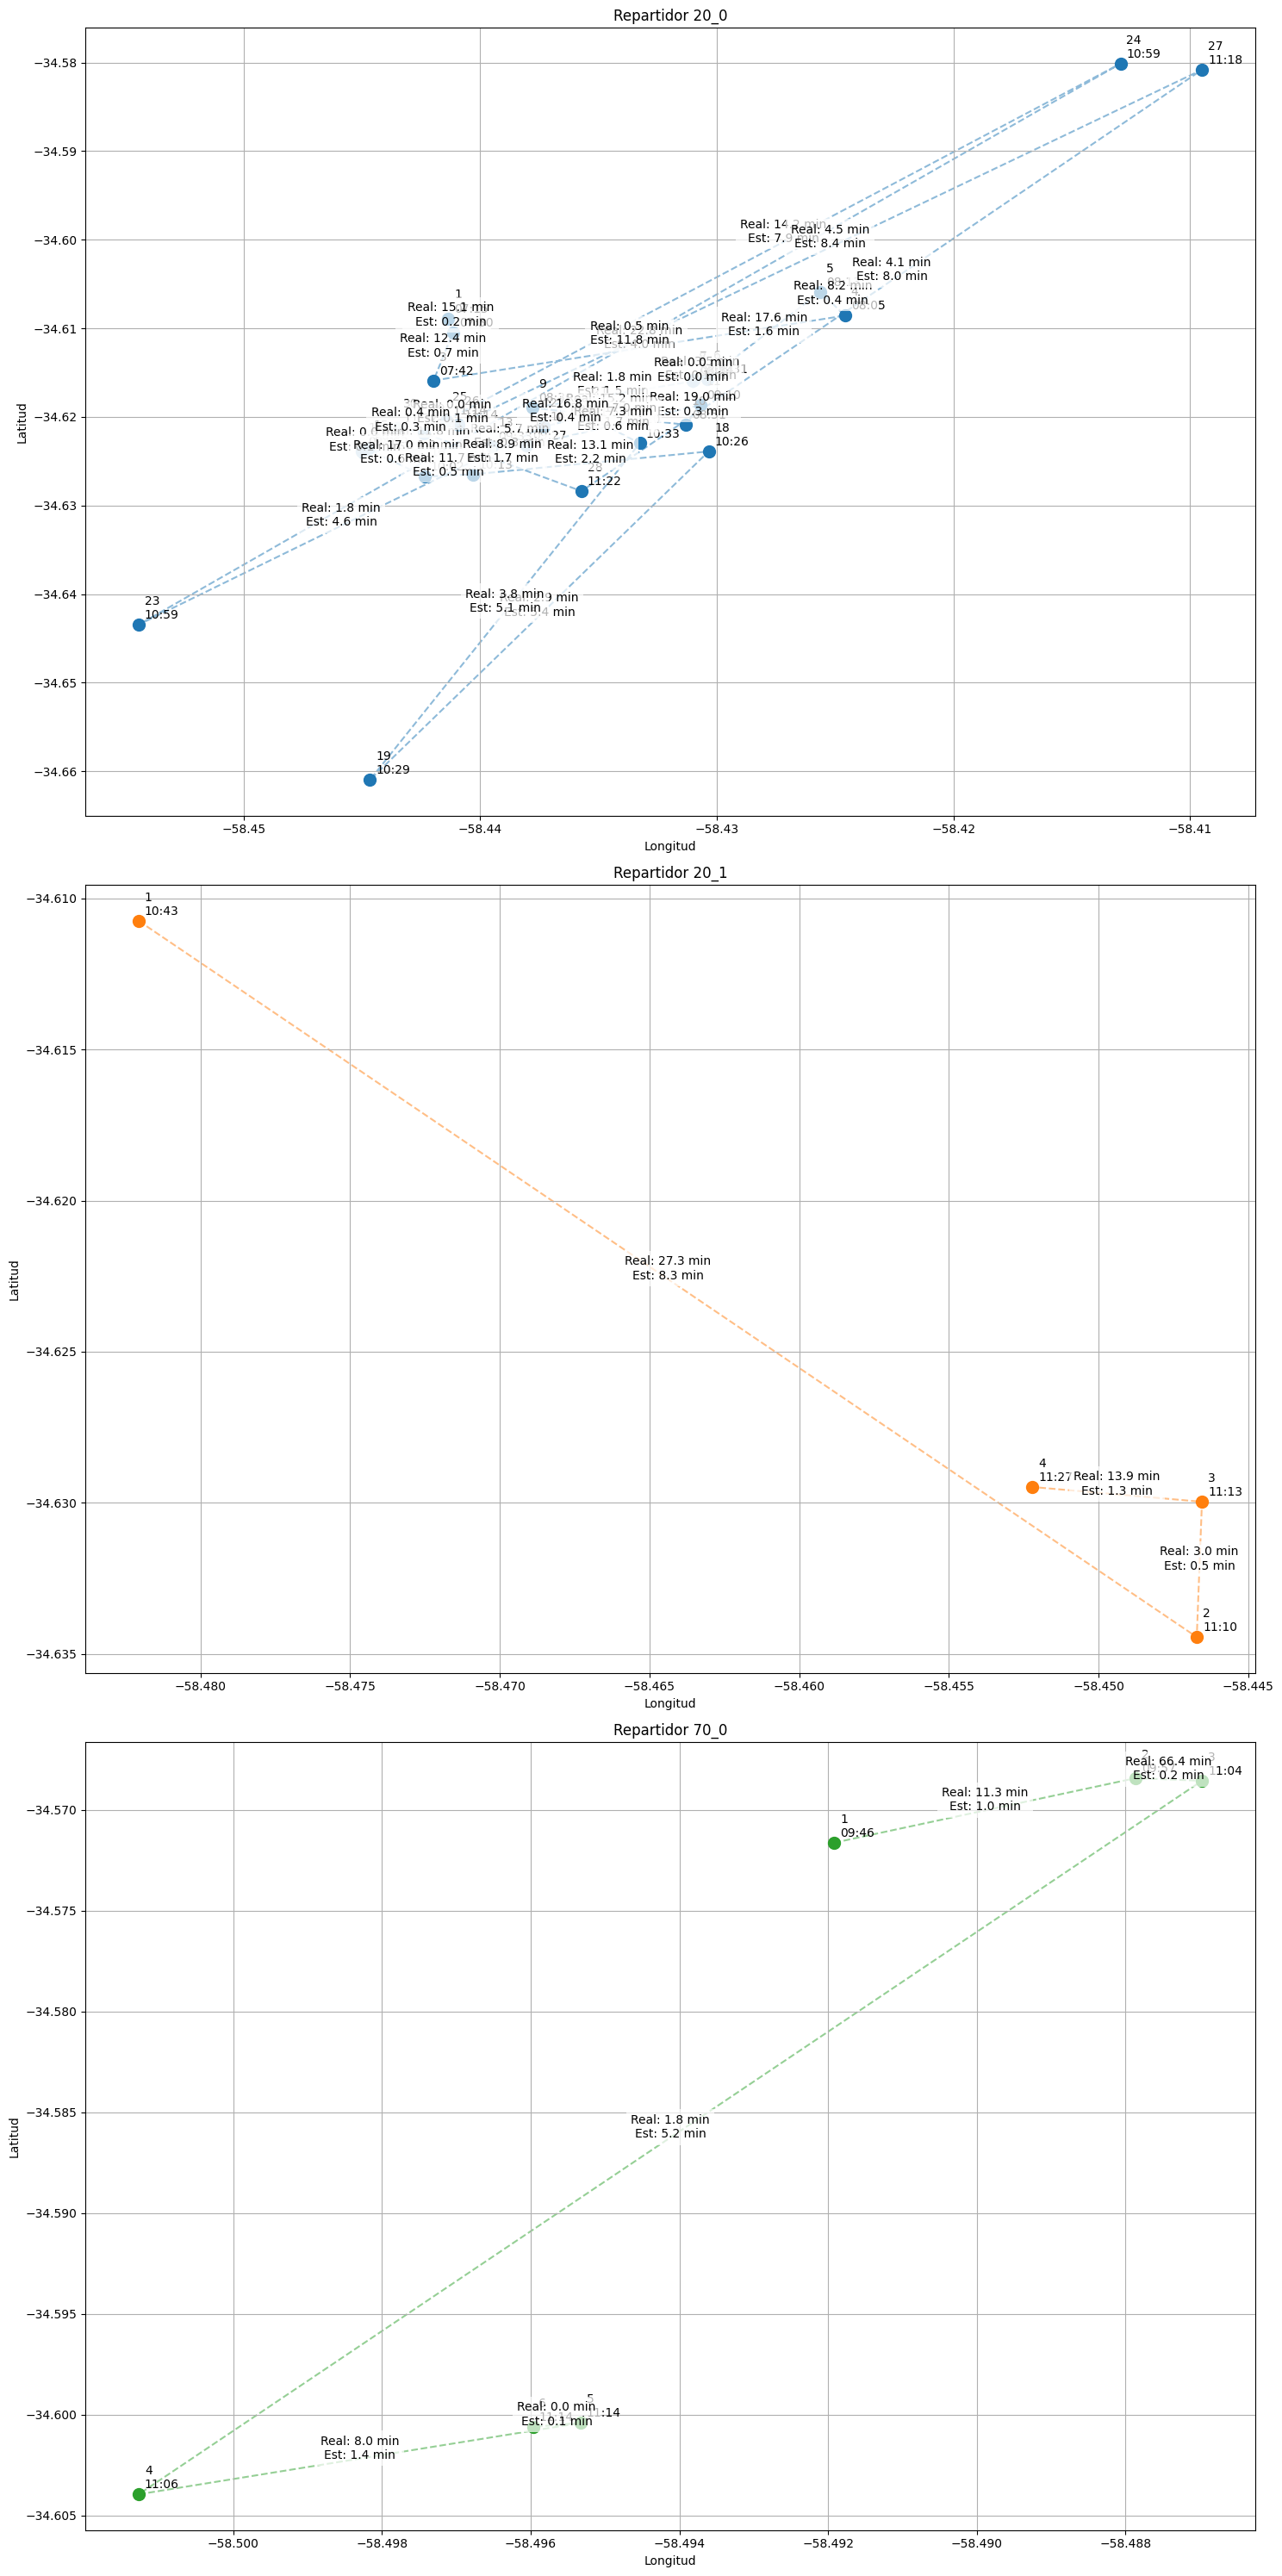

In [30]:
# Crear una figura con subplots verticales
num_repartidores = len(asignaciones)
fig, axs = plt.subplots(num_repartidores, 1, figsize=(15, 10*num_repartidores))

# Graficar las entregas de cada repartidor en su propio subplot
for idx, (repartidor, entregas_repartidor) in enumerate(asignaciones.items()):
    entregas_df = pd.DataFrame(entregas_repartidor)
    # Ordenar entregas cronológicamente
    entregas_df = entregas_df.sort_values('fin_visita')
    
    # Obtener coordenadas
    latitudes = entregas_df['latitud']
    longitudes = entregas_df['longitud']
    fin_visitas = entregas_df['fin_visita']
    
    # Graficar puntos y líneas
    color = colores[idx % len(colores)]
    axs[idx].scatter(longitudes, latitudes, c=color, s=100, zorder=2)
    
    # Conectar puntos con líneas según orden cronológico
    axs[idx].plot(longitudes, latitudes, c=color, alpha=0.5, linestyle='--', zorder=1)
    
    # Configurar detalles del subplot
    axs[idx].set_title(f'Repartidor {repartidor}')
    axs[idx].set_xlabel('Longitud')
    axs[idx].set_ylabel('Latitud')
    axs[idx].grid(True)
    
    # Agregar números y tiempos a los puntos para mostrar el orden
    for i, (lon, lat, tiempo) in enumerate(zip(longitudes, latitudes, fin_visitas)):
        # Convertir a datetime si es string
        if isinstance(tiempo, str):
            tiempo = pd.to_datetime(tiempo)
        tiempo_str = tiempo.strftime('%H:%M')
        axs[idx].annotate(f'{i+1}\n{tiempo_str}', (lon, lat), xytext=(5, 5), 
                         textcoords='offset points')
    
    # Agregar diferencias de tiempo y tiempo estimado en el medio de las líneas
    for i in range(len(entregas_df)-1):
        tiempo1 = pd.to_datetime(fin_visitas.iloc[i])
        tiempo2 = pd.to_datetime(fin_visitas.iloc[i+1])
        diferencia = (tiempo2 - tiempo1).total_seconds() / 60  # Diferencia en minutos
        
        # Calcular punto medio entre entregas
        lon_mid = (longitudes.iloc[i] + longitudes.iloc[i+1]) / 2
        lat_mid = (latitudes.iloc[i] + latitudes.iloc[i+1]) / 2
        
        # Calcular tiempo estimado usando haversine
        tiempo_estimado = estimate_time_distance(
            longitudes.iloc[i], latitudes.iloc[i],
            longitudes.iloc[i+1], latitudes.iloc[i+1]
        )
        
        # Agregar anotación con la diferencia de tiempo y tiempo estimado
        axs[idx].annotate(f'Real: {diferencia:.1f} min\nEst: {tiempo_estimado:.1f} min', 
                         (lon_mid, lat_mid),
                         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                         ha='center')

plt.tight_layout()
plt.show()

### Aplicación en la logística
Al utilizar la coloración de grafos en las rutas de entrega, se pueden identificar patrones y optimizar la asignación de entregas a repartidores, considerando factores como la distancia y el orden cronológico de las entregas.

## Resultados
Se desarrolló un programa en Python que:
* Procesa datos geográficos y temporales de las entregas.
* Construye un grafo donde los nodos representan puntos de entrega y las aristas conectan entregas cercanas en tiempo y espacio.
* Aplica algoritmos de coloración para asignar rutas a repartidores.
* Visualiza las rutas mediante gráficos interactivos, facilitando el análisis y la interpretación de los datos.

Los gráficos generados permiten observar claramente las rutas asignadas a cada repartidor, identificadas por diferentes colores, y analizar la eficiencia de las mismas.

## Apéndice
A continuación, se presenta el código que implementa las técnicas descritas:

Condiciones
1. Entregas unicas por cliente
2. Tiempo y distancia entre entregas 
3. Tiempo estimado no puede ser menor a tiempo real ya que el tiempo de entrega no se toma en cuenta.